# _*Laurel or Yanny?*_ 

The latest version of this notebook is available on https://github.com/QISKit/qiskit-tutorial.

For more information about how to use the IBM Q Experience (QX), consult the [tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Adam D. Perruzzi, IBM Q Consulting
***

#### Prerequisite
To run this tutorial, you must have audio-related libraries installed. 
In MacOS, they can be installed by:
```
pip install pydub
brew install portaudio
pip install pyaudio
```

You also have to download [laurel.wav](https://github.com/APerruzziIBM/qiskit-tutorial/blob/f67e5d53d424b520cb510e8bcf00dbc2fafa8769/hello_world/laurel_or_yanny_audio_files/laurel.wav?raw=true) and [yanny.wav](https://github.com/APerruzziIBM/qiskit-tutorial/blob/f67e5d53d424b520cb510e8bcf00dbc2fafa8769/hello_world/laurel_or_yanny_audio_files/yanny.wav?raw=true) files, and the put them under the directory `laurel_or_yanny_audio_files`. 
***

This program is a 'Hello World' type introduction to the world of quantum computing. It introduces some of the basic concepts of quantum computing in a way that is informative, fun, and engaging.

One of the functions of quantum computers - more specifically of the qubits that comprise the quantum computer - is the ability to generate truly random numbers. Classical random number generators are often [pseudo-random](https://www.random.org/randomness), meaning that they are not truly random. Instead, these numbers are often generated using a seed, such as the curent timestamp.

One can obtain a random number from a quantum computer by polling a single qubit. In doing so, the qubit 'chooses' to be either a 0 or a 1 in a purely random way. Repeating this polling many times and averaging the results will tend towards an average value of 0.5. That is the method we'll use for this program.

And what can we use our random number for? Certainly a great number of important things, but also to try and settle one of the great debates of our time: Laurel or Yanny?

In May 2018, an audio clip was discovered on Vocabulary.com accompanying the word [laurel](https://www.vocabulary.com/dictionary/laurel). The clip went viral as part of a tweet, and listeners from around the world weighed in on what they thought they heard. Some heard the intended word 'laurel' while others heard 'yanny'. There are some interesting notes on why this is the case in [this Wired article](https://www.wired.com/story/yanny-and-laurel-true-history).

As the jury is still out on exactly what word people are hearing, let's ask a quantum computer what it thinks! The first step is to import the required libraries and initialize the quantum and classical registers that will be used for this program. 

In [1]:
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.visualization import plot_histogram

#Set up the quantum and classical registers, and combine them into a circuit
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

qc.h(qr[0]) #Create a superposition on the single quantum bit
qc.measure(qr[0], cr[0]) #Measure the single bit, and store its value in the clasical bit

We also need to set up the credentials to access the IBM quantum computers. Make sure you've got an IBM Q Experience account set up, and you retrieve your API to paste below (or into the Qconfig.py file, if desired).

In [2]:
from qiskit import register, available_backends, get_backend

#Import the config file (Qconfig.py) to retrieve the API token and API url
try:
    import sys
    sys.path.append('../') #Parent directory
    import Qconfig
    qx_config = {
        'APItoken': Qconfig.APItoken,
        'url': Qconfig.config['url']}
except Exception as e:
    print(e)
    qx_config = {
        'APItoken':'YOUR_TOKEN_HERE',
        'url':'https://quantumexperience.ng.bluemix.net/api'}

#Setup API
register(qx_config['APItoken'], qx_config['url'])

We can now run the program on the quantum simulator. You can replace the selected simulation backend with the real quantum computer, if you don't mind a bit of a wait in the queue.

You can also change the number of 'shots' taken, or the number of times the program is run. The smaller this number is, the more likely the average will favor one outcome over the other. The larger this number is, the more likely the results will be split 50-50. You'll be able to see the effects of this difference in the eventual audio output.

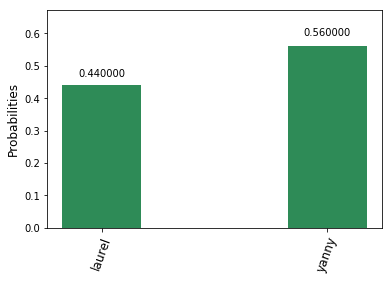

In [3]:
backend = 'ibmq_qasm_simulator' #Replace 'ibmq_qasm_simulator' with 'ibmqx5' to run on the quantum computer
shots_sim = 100 #Adjust this number as desired, with effects as described above

job_sim = execute(qc, backend, shots=shots_sim) #Run job on chosen backend for chosen number of shots
stats_sim = job_sim.result().get_counts() #Retrieve results

#Select '0' to represent 'laurel'
if '0' not in stats_sim.keys():
    stats_sim['laurel'] = 0
else:
    stats_sim['laurel'] = stats_sim.pop('0')

#Which leaves '1' to represent 'yanny'
if '1' not in stats_sim.keys():
    stats_sim['yanny'] = 0
else:
    stats_sim['yanny'] = stats_sim.pop('1')

plot_histogram(stats_sim)

This graph shows how often the qubit was measured to be a 0, and how often it was measured to be a 1. We can use these results to help us find the answer to the laurel/yanny debate.

We can do this by starting with two separate audio tracks, one for laurel and one for yanny. These tracks have been equalized to highlight one name or the other. First we have to install the required libraries. If you're having trouble, follow the guide for pydub installation available [here](https://github.com/jiaaro/pydub#installation).

In [4]:
from pydub import AudioSegment
from pydub.playback import play

#Import two tracks
laurel = AudioSegment.from_wav('laurel_or_yanny_audio_files/laurel.wav')
yanny = AudioSegment.from_wav('laurel_or_yanny_audio_files/yanny.wav')

/Users/rraymondhp/miniconda3/envs/QISKitenv/lib/python3.6/site-packages/pydub/utils.py:178: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


If you've never been able to hear one name or the other, take a listen to either or both of the two tracks below. I can't guarantee you'll hear both distinctly, but these tracks will get you as close as possible!

In [5]:
play(laurel) #Listen to the laurel-specific track

In [6]:
play(yanny) #Listen to the yanny-specific track

Now we can apply our results from the quantum computer to these audio tracks. We can do this by proportionally reducing the volume for the less common track, and increasing the volume for the more common track.

In [7]:
#Modify the volumes based on the results of the experiment
laurel = laurel + ((100*stats_sim['laurel']/shots_sim)-50) #Laurel
yanny = yanny + ((100*stats_sim['yanny']/shots_sim)-50) #Yanny

#Mix the two together and play the result
mixed = laurel.overlay(yanny)
play(mixed)

If you're having trouble getting the above clip to play in the notebook, you can run the code below to download the clip using your audio player of choice. The audio file will be placed in the same folder as the other audio files.

In [8]:
mixed.export('laurel_or_yanny_audio_files/quantumLaurelYanny.wav', format='wav')

<_io.BufferedRandom name='laurel_or_yanny_audio_files/quantumLaurelYanny.wav'>

If the results above are roughly 50-50, the combination will sound similar to the original track. If the experiment was conducted with fewer shots, the clip may lean more towards one sound or another. Go back earlier in the program to change the number of shots, re-run, and see if you can get one or the other to sound stronger or weaker.

You can also change the backend to run this on an actual quantum computer, instead of a simulation. It may take a while to run, as there may be a queue for the machine.

***

And there you have it! Clearly the quantum computer can't make up its mind what it hears either, so the question will just have to go unanswered for the time being :)